<a href="https://colab.research.google.com/github/Happday-bot/Quantum-Computing-Projects/blob/main/more_on_QB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=eec1594a91b4a3d1a50cd5832b6d4c4cb57191c3d8d87776f752677afaf8a848
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 97.4 MB/s eta 0:00:00


In [ ]:
import qiskit as qk
print(qk.__version__)

2.0.1


In [ ]:
import qiskit as qk
import numpy as np
import inspect
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit.visualization import array_to_latex
from qiskit_aer import AerSimulator
from qiskit.circuit.library import UGate
from numpy import pi, random
import math

# **Ancilla Register**

ancilla
circuit-162
0


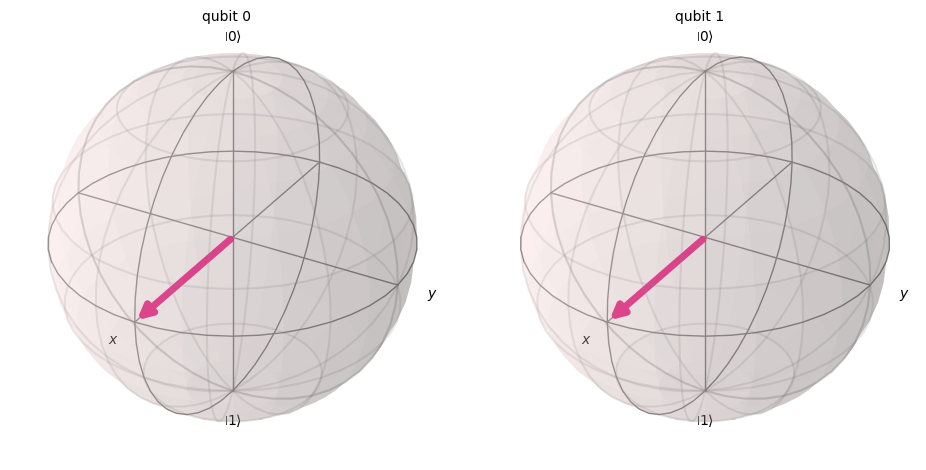

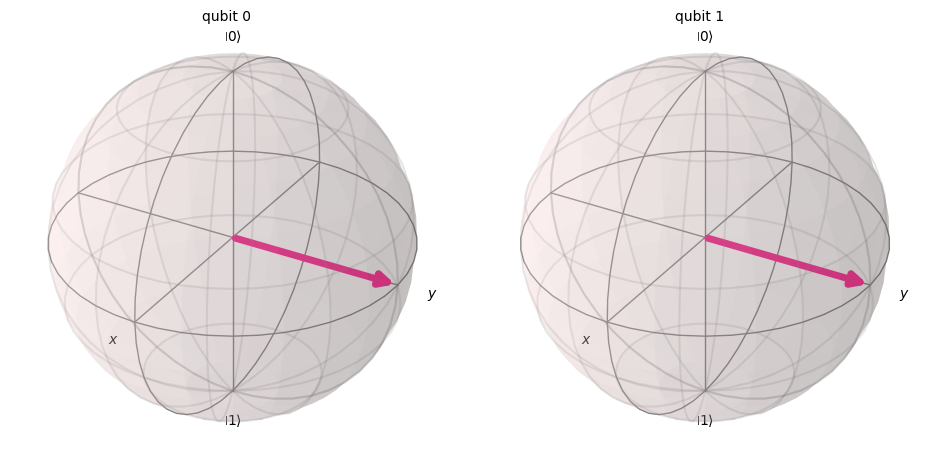

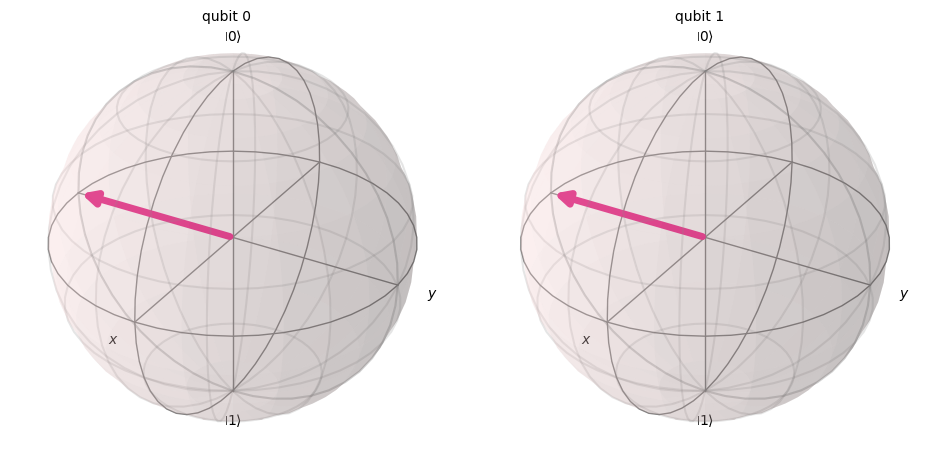

┌───┐┌───┐┌───┐
ancilla_0: ┤ H ├┤ S ├┤ H ├
           ├───┤├───┤├───┤
ancilla_1: ┤ H ├┤ S ├┤ H ├
           └───┘└───┘└───┘

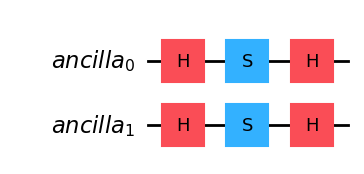

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{ancilla}_{0} :  } & \\lstick{{ancilla}_{0} :  } & \\gate{\\mathrm{H}} & \\gate{\\mathrm{S}} & \\gate{\\mathrm{H}} & \\qw & \\qw\\\\\n\t \t\\nghost{{ancilla}_{1} :  } & \\lstick{{ancilla}_{1} :  } & \\gate{\\mathrm{H}} & \\gate{\\mathrm{S}} & \\gate{\\mathrm{H}} & \\qw & \\qw\\\\\n\\\\ }}\n\\end{document}'

┌───┐┌───┐┌───┐
ancilla_0: ┤ H ├┤ S ├┤ H ├
           ├───┤├───┤├───┤
ancilla_1: ┤ H ├┤ S ├┤ H ├
           └───┘└───┘└───┘

In [ ]:
from qiskit import QuantumRegister

ancilla_reg = QuantumRegister(2, 'ancilla')
qc = QuantumCircuit(ancilla_reg)
print(ancilla_reg.name)
print(qc.name)
print(qc.size())
qc.h(ancilla_reg)
display(plot_bloch_multivector(qc))
qc.s(ancilla_reg)
display(plot_bloch_multivector(qc))
qc.h(ancilla_reg)
display(plot_bloch_multivector(qc))
display(qc.draw())
display(qc.draw(output = "mpl"))
display(qc.draw(output = "latex_source"))
display(qc.draw(output = "text"))

### use of index and name and size

In [ ]:
qreg = QuantumRegister(3, 'q')
print(qreg.index(qreg[1]))  # position of a qubit in the given circuit
print(qreg.name) # Name of the qubit
print(qreg.size) # Number of qubits in the given register

1
q
3


# **FOR undersatding the gates and thier combinations**

Here are many single-qubit gate combinations:

### **Pauli & Hadamard-Based Combinations**  
- \( X = H Z H \)  
- \( Y = S X S^\dagger \)  
- \( Z = H X H \)  
- \( H = R_Y(\frac{\pi}{2}) R_Z(\pi) \)  
- \( HSH = X \)  
- \( HZH = X \)  
- \( HXH = Z \)  
- \( HYH = -Y \)  
- \( S H S^\dagger = Y H \)  

### **Rotation & Phase Shift Combinations**  
- \( R_X(\theta) = H R_Z(\theta) H \)  
- \( R_Y(\theta) = S^\dagger R_X(\theta) S \)  
- \( R_Z(\theta) = P(\theta) \)  
- \( S = P(\pi/2) \)  
- \( T = P(\pi/4) \)  
- \( P(\theta) = R_Z(\theta) \)  

### **More Complex Single-Qubit Gate Combinations**  
- \( X = R_Y(\pi) \)  
- \( Z = R_Z(\pi) \)  
- \( Y = R_Z(\pi) X \)  
- \( X = H P(\pi) H \)  
- \( Z = S^2 \)  
- \( Y = i S X S^\dagger \)  
- \( X = HSHSH \)  

# **AND**

## Here are more **Pauli & Hadamard-Based Combinations**:  

- \( X = H Z H \)  
- \( Z = H X H \)  
- \( Y = i S X S^\dagger \)  
- \( H Z H = X \)  
- \( H X H = Z \)  
- \( H Y H = -Y \)  
- \( S H S^\dagger = Y H \)  
- \( H S H = P(\pi/2) H \)  
- \( S^\dagger H S = H P(-\pi/2) \)  
- \( H S H S H = X \)  
- \( S^2 = Z \)  
- \( T^4 = Z \)  
- \( H T^2 H = S \)  
- \( H T^3 H = S^\dagger \)  
- \( H P(\pi) H = X \)  
- \( H P(-\pi) H = X \)  
- \( H S^2 H = X \)  
- \( H Z H = X \)  
- \( H X H = Z \)  
- \( H S^2 H = X \)  
- \( S H S H S H S H = I \)  


In [ ]:
# from qiskit.circuit import QuantumCircuit
# from qiskit.circuit.classical import expr
# from qiskit.circuit.classical.types import Int  # Import Int from types

# qc = QuantumCircuit(1)
# my_var = expr.Var("capture_me", Int())  # Define a variable with an integer type
# qc.add_capture(my_var)  # Capture it in the circuit's scope

# print(qc)
# ########################################################################################################################################This is a red flag zone

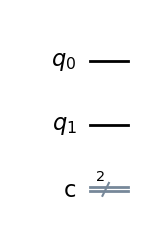

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qc = QuantumCircuit(2,2)

qc.draw(output = "mpl")



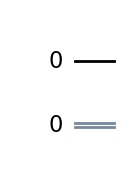

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Qubit, Clbit

qc = QuantumCircuit()
qubit = Qubit()  # Creating a single qubit
clbit = Clbit()  # Creating a single classical bit

qc.add_bits([qubit, clbit])  # Adding raw bits (not registers)

qc.draw(output = "mpl")



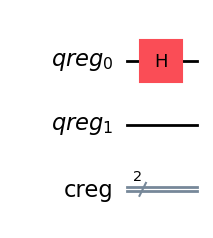

In [ ]:
qr = QuantumRegister(2, "qreg")  # Create a 2-qubit register
cr = ClassicalRegister(2, "creg")  # Create a 2-bit classical register

qc = QuantumCircuit()
qc.add_register(qr, cr)  # Adds registers instead of individual bits

qc.h(0)

qc.draw(output = "mpl")

In [ ]:
print(qc.ancillas)
anc = QuantumRegister(2, "ancilla")
qc.add_register(anc)
print(qc.ancillas)
print(qc.qubits)
print(qc.qregs)

[]
[]
[<Qubit register=(2, "qreg"), index=0>, <Qubit register=(2, "qreg"), index=1>, <Qubit register=(2, "ancilla"), index=0>, <Qubit register=(2, "ancilla"), index=1>]
[QuantumRegister(2, 'qreg'), QuantumRegister(2, 'ancilla')]


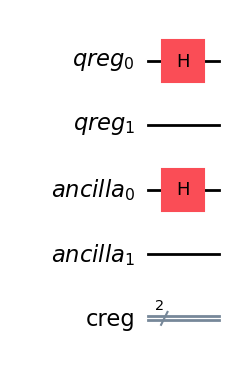

In [ ]:
from qiskit.circuit.library import HGate

# Append a Hadamard gate to qubit 0.
qc.append(HGate(), [2])
qc.draw("mpl")

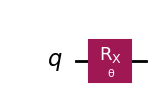

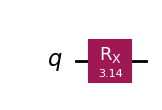

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

# Create a parameterized circuit.
qc = QuantumCircuit(1)
theta = Parameter('θ')
qc.rx(theta,0)
display(qc.draw("mpl"))
# Bind the parameter.
bound_qc = qc.assign_parameters({theta: 3.14})
bound_qc.draw("mpl")


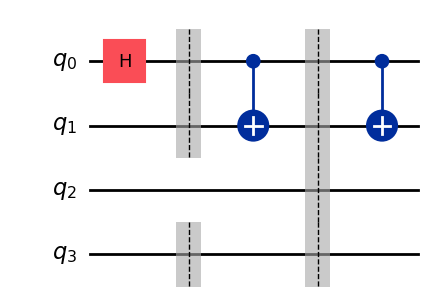

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(4)
qc.h(0)
qc.barrier(1,0,3)
qc.cx(0, 1)
qc.draw("mpl")
qc.barrier()
qc.cx(0, 1)
qc.draw("mpl")


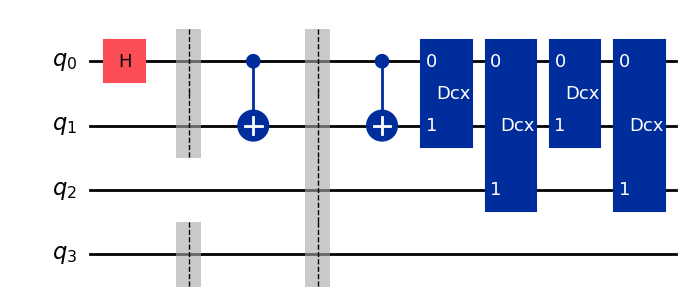

In [ ]:
qc.dcx(0, 1)
qc.dcx(0, 2)
qc.draw(output = "mpl")


┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        ├───┤┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ H ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

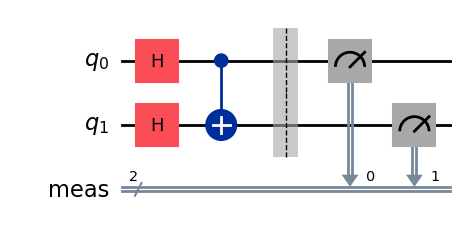

CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>,), clbits=())
CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=1>,), clbits=())
CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())
CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())
CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(<Qubit register=(2, "q"), index=0>,), clbits=(<Clbit register=(2, "meas"), index=0>,))
CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(<Qubit register=(2, "q"), index=1>

3

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)  # Create a quantum circuit with 2 qubits
qc.h(0)                 # Apply Hadamard gate on qubit 0
qc.h(1)
qc.cx(0, 1)             # Apply CNOT (CX) gate from qubit 0 to qubit 1
qc.measure_all()         # Measure all qubits
display(qc.draw())
display(qc.draw(output = "mpl"))
# Retrieve circuit data
for i in qc.data:
  print(i)
qc.depth()

# **Why Does the Barrier Appear?**

**When you call `qc.measure_all()`, Qiskit groups all measurements together and inserts a barrier before the measurements.**

This ensures that no unintended operations occur between quantum gates and measurements.
It helps visualize the separation between quantum computation (before the measurement) and classical readout (after the measurement).


# **How to Prevent the Barrier?**
If you want to measure all qubits `without introducing a barrier`, you should manually add measurements instead of using qc.measure_all().

In [ ]:
qc = QuantumCircuit(2, 2)  # Explicitly define classical bits
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)

display(qc.draw())  # No automatic barrier

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

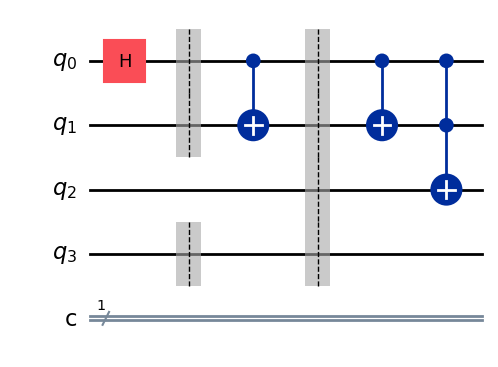

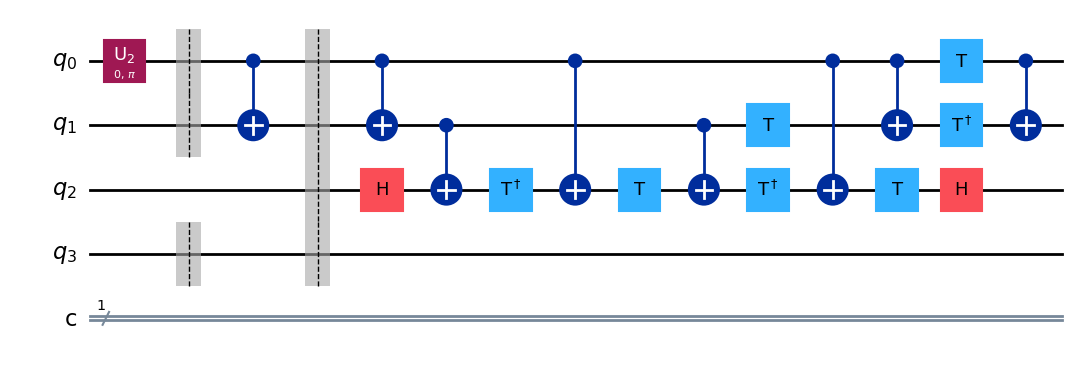

In [ ]:
qc = QuantumCircuit(4,1)
qc.h(0)
qc.barrier(1,0,3)
qc.cx(0, 1)
qc.barrier()
qc.cx(0, 1)
qc.ccx(0, 1, 2)
decomposed_qc = qc.decompose()
display(qc.draw(output = "mpl"))
display(decomposed_qc.draw(output = "mpl"))

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)  # Create a circuit with 1 qubit
qc.h(0)                 # Apply Hadamard gate to qubit 0
qc.delay(10, 0, unit="ns")  # Add a delay of 10 nanoseconds on qubit 0
qc.measure_all()         # Measure all qubits

print(qc)
qc.depth()

        ┌───┐┌───────────────┐ ░ ┌─┐
     q: ┤ H ├┤ Delay(10[ns]) ├─░─┤M├
        └───┘└───────────────┘ ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0 


3

# **Depth**

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)       # Layer 1
qc.cx(0, 1)   # Layer 2
qc.h(1)       # Layer 3

print(qc.depth())  # Output: 3

qc.draw()


3


┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐┌───┐
q_1: ─────┤ X ├┤ H ├
          └───┘└───┘

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)       # Layer 1
qc.h(0)       # Layer 2
qc.cx(0, 1)   # Layer 3

print(qc.depth())  # Output: 3

qc.draw()


3


┌───┐┌───┐     
q_0: ┤ H ├┤ H ├──■──
     └───┘└───┘┌─┴─┐
q_1: ──────────┤ X ├
               └───┘

# For measuring only the dept of multi qubit gates

**Since only `cx(0,1)` is a multi-qubit gate, the circuit depth considering only multi-qubit gates is 1.**

In [ ]:
qc.depth(lambda instr: len(instr.qubits) > 1)  # Only count multi-qubit gates

1

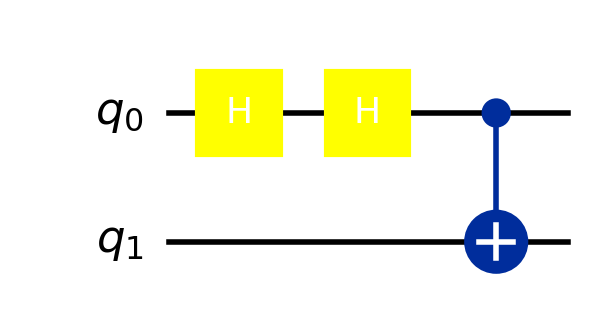

In [ ]:
qc.draw(output='mpl', scale=2, style={'displaycolor': {'h': 'yellow'}})


In [ ]:
qc.add_register(QuantumRegister(1, 'Q'))
display(qc.draw(output='text', idle_wires=False))
#remove unused qubit from diagram


print("When used with idle wires equals true")
qc.draw(output='text', idle_wires=True)

┌───┐┌───┐     
q_0: ┤ H ├┤ H ├──■──
     └───┘└───┘┌─┴─┐
q_1: ──────────┤ X ├
               └───┘

When used with idle wires equals true


┌───┐┌───┐     
q_0: ┤ H ├┤ H ├──■──
     └───┘└───┘┌─┴─┐
q_1: ──────────┤ X ├
               └───┘
  Q: ───────────────

In [ ]:
qc.draw(output='text', reverse_bits=True)

Q: ───────────────
               ┌───┐
q_1: ──────────┤ X ├
     ┌───┐┌───┐└─┬─┘
q_0: ┤ H ├┤ H ├──■──
     └───┘└───┘

# Definition
of the ECR Gate
The **`Echoed Cross Resonance (ECR) gate`** is a modified CNOT-like operation used in IBM quantum hardware.
It consists of two cross-resonance (CR) pulses applied with an intermediate π-pulse to cancel unwanted interactions.

Mathematically, it is defined as:

𝐸
𝐶
𝑅
=
𝑖
(
𝑋
⊗
𝐼
)
⋅
CNOT
ECR=i(X⊗I)⋅CNOT
This means:

The control qubit gets an X (NOT) gate applied.
The CNOT operation follows with the second qubit as the target

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.ecr(0, 1)

qc.draw(output='text')


┌──────┐
q_0: ┤0     ├
     │  Ecr │
q_1: ┤1     ├
     └──────┘

In [ ]:
from qiskit.circuit.library import XGate, CXGate

qc = QuantumCircuit(2)
qc.append(XGate(), [0])  # Apply X gate to qubit 0
qc.append(CXGate(), [0, 1])  # Apply CNOT (CX) from qubit 0 to 1

qc.draw()

┌───┐     
q_0: ┤ X ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

# **implementation of ECR**

1
**Faster CNOT Implementation**

On IBM's superconducting qubit hardware, CNOT (CX) is often built from multiple pulses.
The ECR gate provides a hardware-native equivalent that is faster and less noisy.

2
**Hardware-Efficient Compilation**

When compiling quantum circuits for real devices, transpilers replace CX with ECR automatically.
If you manually use ECR, it avoids unnecessary gate decompositions.


3 **Quantum Error Mitigation**

ecr reduces gate fidelity loss by minimizing unwanted qubit interactions.
Especially useful in noisy intermediate-scale quantum (NISQ) devices.


4 **Cross-Resonance-Based Qubit Coupling**

When designing custom quantum processors, ecr helps implement cross-resonance interactions directly.

**Conclusion**

`✔ Use ecr instead of cx when working with IBM Quantum hardware.`

`✔ Improves speed and reduces noise in real hardware execution.`

`✔ Automatically replaces CX in transpilation, so defining ecr manually can optimize circuits.`

In [ ]:
import numpy as np
from qiskit.transpiler import Target, InstructionProperties
from qiskit.circuit.library import CXGate, U3Gate, HGate
from qiskit import QuantumCircuit

# Create a Target object
target = Target()

# Define gate durations for specific qubits
target.add_instruction(CXGate(), {(0, 1): InstructionProperties(duration=200)})  # CXGate (2-qubit)
target.add_instruction(U3Gate(np.pi/2, np.pi/4, np.pi/8), {(0,): InstructionProperties(duration=50)})  # U3Gate (1-qubit)
target.add_instruction(HGate(), {(0,): InstructionProperties(duration=30)})  # Added HGate duration

# Define a quantum circuit
qc = QuantumCircuit(2)
qc.h(0)  # Hadamard on qubit 0
qc.cx(0, 1)  # CNOT gate

# Estimate execution duration
duration = qc.estimate_duration(target=target)
print(f"Estimated duration: {duration} seconds")


Estimated duration: 230.0 seconds


in a real quantum backend, gate durations are not typically as long as 50s or 200s. Instead, they are defined in `nanoseconds (ns) or microseconds (µs).`

# **How Are Gates Defined in a Real Backend?**

Each backend has a Target object, which specifies:

Supported gates (H, CX, U3, etc.).
Gate durations (usually in ns or µs).
Error rates for each gate.
Gate durations vary per backend.

CX gates (CNOT) may take tens to hundreds of nanoseconds.
U3 gates may take single-digit nanoseconds.
Measurement (readout) takes longer than gate operations.



# **`CALIBRATION OF DURATION IN REAL BACKEND`**
IBM Quantum backends automatically define the gate durations based on hardware calibration data.

How Are Gate Durations Determined in a Real Backend?
Quantum hardware is calibrated regularly.

Gate durations are measured using pulse-level experiments on real qubits.
These durations change slightly over time due to hardware fluctuations.
IBM Quantum backends provide a Target object.

`You can query gate durations programmatically.
No need to set durations manually.`

BitLocations(index=1 registers=[(QuantumRegister(2, 'q'), 1)])


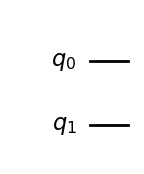

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)  # Create a circuit with 2 qubits
qubit_ref = qc.qubits[1]  # Get the actual Qubit object
index = qc.find_bit(qubit_ref)  # Find its location
print(index)
qc.draw(output="mpl")

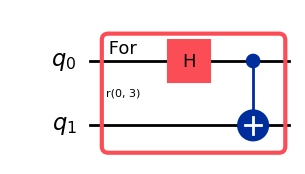

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit import ForLoopOp, Parameter

qc = QuantumCircuit(2)
theta = Parameter("θ")

# Create a subcircuit that will repeat
subcircuit = QuantumCircuit(2)
subcircuit.h(0)
subcircuit.cx(0, 1)

# Define a loop that repeats 3 times
loop = ForLoopOp(range(3), None, subcircuit)  # No classical index used

qc.append(loop, qc.qubits)  # Apply loop to qubits

qc.draw("mpl")


/usr/local/lib/python3.11/dist-packages/qiskit/visualization/circuit/circuit_visualization.py:276: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  if check_clbit_in_inst(block, cregbundle) is False:


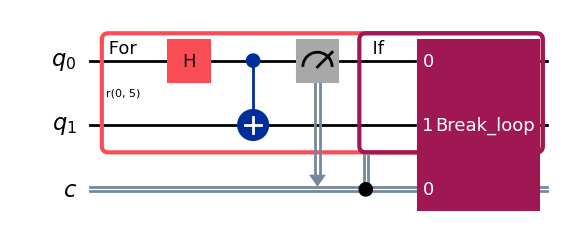

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.controlflow import BreakLoopOp

qc = QuantumCircuit(2, 1)  # 2 qubits, 1 classical bit

with qc.for_loop(range(5)) as i:  # Looping 5 times
    qc.h(0)
    qc.cx(0, 1)
    qc.measure(0, 0)

    with qc.if_test((qc.clbits[0], 1)):  # Condition: if classical bit 0 is 1
        qc.append(BreakLoopOp(2, 1), [0, 1], [0])  # Provide qubit and clbit references

qc.draw("mpl")


# **RECONSTRUCTION OF A CIRCUIT**


Instruction(name='circuit-202', num_qubits=2, num_clbits=0, params=[])


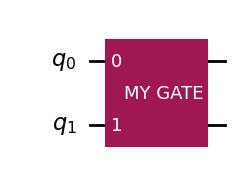

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Convert to instruction
qc_inst = qc.to_instruction(label = "MY GATE")
print(qc_inst)
# Create a new circuit using the instruction
new_circuit = QuantumCircuit(2)
new_circuit.append(qc_inst, [0, 1])  # Apply the instruction to qubits 0 and 1

new_circuit.draw(output="mpl")


# **Creation of QASM and loading it**

In [ ]:
from qiskit import QuantumCircuit
from qiskit.qasm2 import dumps  # ✅ Correct way to export QASM

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Convert circuit to QASM string
qasm_code = dumps(qc)  # ✅ Correct way to get QASM 2.0 code

# Save it to a file
with open("circuit.qasm", "w") as f:
    f.write(qasm_code)

print("QASM file saved successfully!")

QASM file saved successfully!


In [ ]:
from qiskit import QuantumCircuit
from qiskit.qasm2 import load

# Read QASM file content
with open("circuit.qasm", "r") as f:
    qasm_str = f.read()

# Load QuantumCircuit from QASM string
qc_loaded = QuantumCircuit.from_qasm_str(qasm_str)

print(qc_loaded.draw())



# OR ..............

print("The use of load method")

qc = load("circuit.qasm")
print(qc.draw())


     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
The use of load method
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


# **From qasm string**

with use of loads method

load -> read file

loads -> reads string

In [ ]:
from qiskit.qasm2 import loads

qasm_code = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
h q[0];
cx q[0], q[1];
"""

# Convert QASM string to QuantumCircuit
qc = loads(qasm_code)
print(qc.draw())

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


Global Phase: 0.0
     ┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
Setting a global phase (example: π)
Global Phase: 3.1415


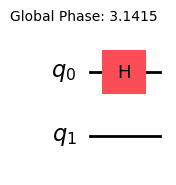

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
print("Global Phase:", qc.global_phase)
print(qc.draw())

print("Setting a global phase (example: π)")
qc.global_phase = 3.1415

print("Global Phase:", qc.global_phase)
qc.draw(output="mpl")


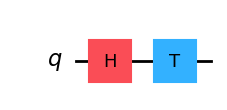

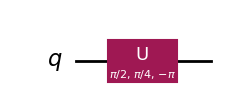

Global Phase: 0.0


In [ ]:
from qiskit import transpile
from qiskit.circuit import QuantumCircuit

qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
display(qc.draw(output="mpl"))
# Transpile to extract unitary with global phase
qc_transpiled = transpile(qc, basis_gates=["u", "cx"])
display(qc_transpiled.draw(output="mpl"))
print("Global Phase:", qc_transpiled.global_phase)


In [ ]:
qc.id(0)

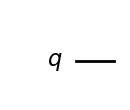

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


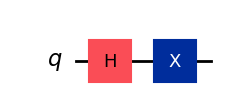

[[ 0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j]]


In [ ]:
import numpy as np
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

# circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 0) # this will introduce the reset which is not supported when using Operator
display(circuit.draw(output="mpl"))


from qiskit.quantum_info import Operator

unitary = Operator(circuit)
print(unitary.data)

circuit.h(0)
circuit.x(0)
display(circuit.draw(output="mpl"))
unitary = Operator(circuit)
print(unitary.data)


# **LOGICAL CIRCUIT**
```
if bits[3] == 0:
    qc.x(2)  # Apply X gate
else:
    qc.h(2)  # Apply Hadamard gate
    qc.z(2)  # Apply Z gate
```

**The qasm equivalent is as follows**


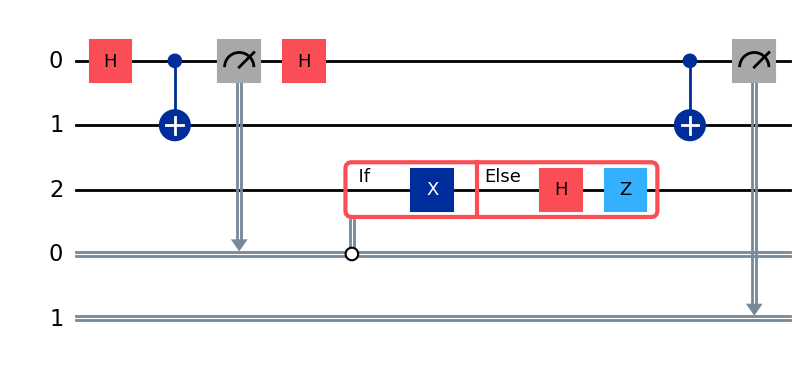

In [ ]:
from qiskit.circuit import QuantumCircuit, Qubit, Clbit
bits = [Qubit(), Qubit(), Qubit(), Clbit(), Clbit()]
qc = QuantumCircuit(bits)

qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 1)

with qc.if_test((bits[3], 0)) as else_:
   qc.x(2)  # Apply X (NOT) gate to qubit 2 if bits[3] == 0
with else_:
    qc.h(2)  # Apply H (Hadamard) gate to qubit 2 if bits[3] != 0
    qc.z(2)  # Apply Z (Phase-flip) gate to qubit 2 if bits[3] != 0


qc.draw(output="mpl")

In [ ]:
qc.inverse().draw(output="mpl")

CircuitError: 'inverse() not implemented for if_else.'

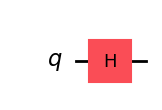

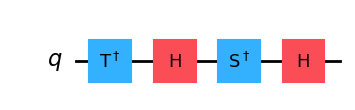

In [ ]:
display(circuit.inverse().draw(output="mpl"))
circuit.s(0)
circuit.h(0)
circuit.t(0)
circuit.inverse().draw(output="mpl")

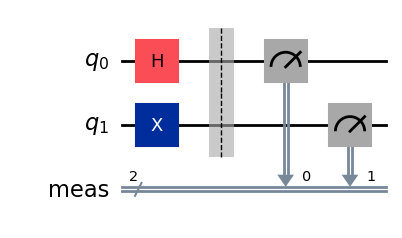

Circuit 1


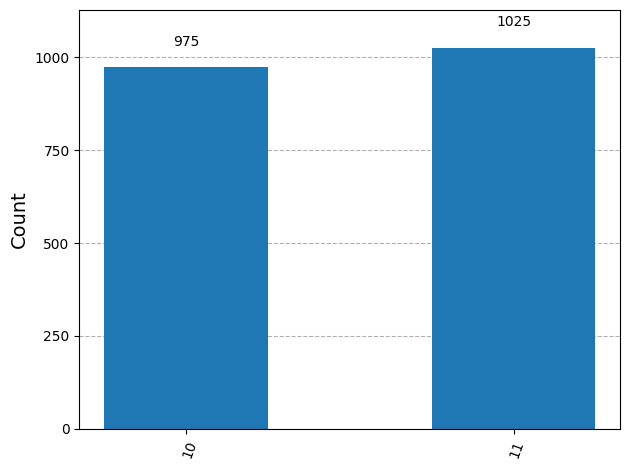

In [ ]:
from qiskit import QuantumCircuit

qc  = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.measure_all()


result = AerSimulator().run(qc, shots = 2000).result()

stat1 = result.get_counts(qc)
display(qc.draw(output="mpl"))

print("Circuit 1")
display(plot_histogram(stat1))

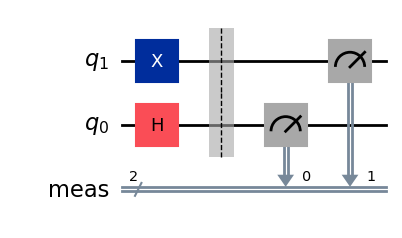

Circuit 1


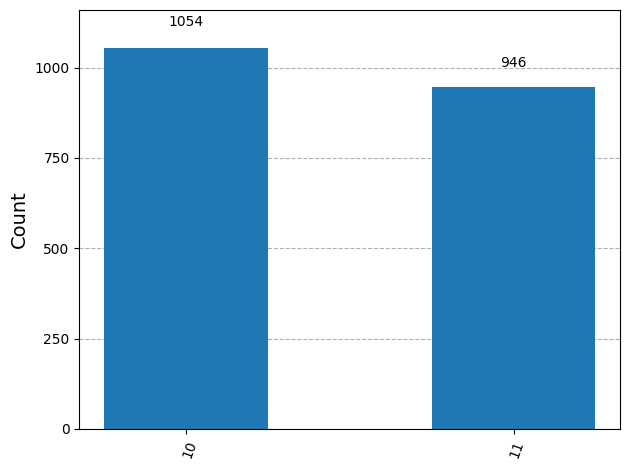

In [ ]:
from qiskit import QuantumCircuit

qc  = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.measure_all()


result = AerSimulator().run(qc, shots = 2000).result()

stat1 = result.get_counts(qc)
display(qc.draw(output="mpl",reverse_bits=True))

print("Circuit 1")
display(plot_histogram(stat1))